In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_regression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error


 ----KNN Classification with different K values----
Accuracy with K=1: 0.96000
Accuracy with K=3: 0.98667
Accuracy with K=5: 0.98667
Accuracy with K=10: 0.96000


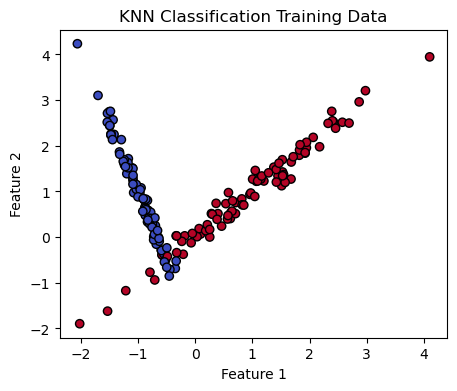

In [42]:
print("\n ----KNN Classification with different K values----") 
X, y = make_classification(n_samples=250, n_features=2, 
                           n_informative=2, n_redundant=0, #checks the redundant value, and we wont keep the redundant values in our dataset
                           n_clusters_per_class=1, class_sep=1.0, #the more the seperation, the easier it would be
                           random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

for k in [1,3,5,10]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"Accuracy with K={k}: {accuracy_score(y_test, preds):.5f}")

plt.figure(figsize=(5,4))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap="coolwarm", edgecolor="k")
plt.title("KNN Classification Training Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


--- KNN Regression with Different K Values ---
MSE with K=2: 616.82
MSE with K=5: 589.62
MSE with K=10: 475.82


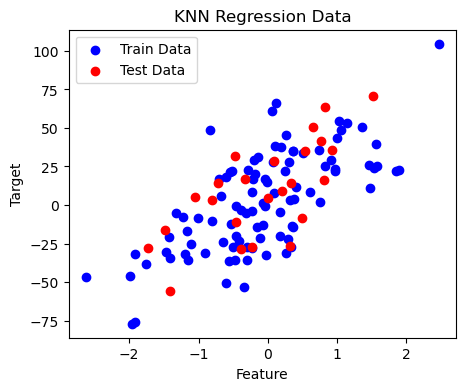

In [43]:
# REGRESSION (Varying K)

print("\n--- KNN Regression with Different K Values ---")

# Generate regression dataset
Xr, yr = make_regression(n_samples=120, n_features=1, noise=25, random_state=42)

# Split data
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.2, random_state=42)

# Try different K values
for k in [2, 5, 10]:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(Xr_train, yr_train)
    preds = model.predict(Xr_test)
    print(f"MSE with K={k}: {mean_squared_error(yr_test, preds):.2f}")

# Plot regression data
plt.figure(figsize=(5,4))
plt.scatter(Xr_train, yr_train, color="blue", label="Train Data")
plt.scatter(Xr_test, yr_test, color="red", label="Test Data")
plt.title("KNN Regression Data")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()


--- KNN Classification with Different K Values ---
Accuracy with K=1: 0.96
Accuracy with K=3: 0.99
Accuracy with K=5: 0.99
Accuracy with K=10: 0.96


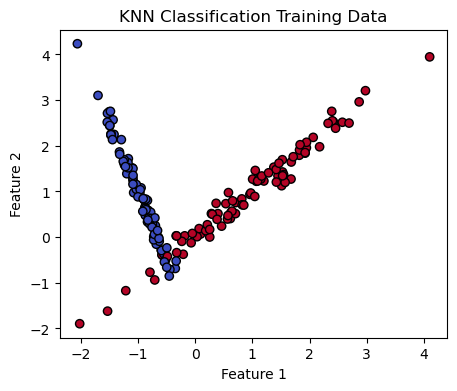

In [44]:
# CLASSIFICATION (Varying K)

print("\n--- KNN Classification with Different K Values ---")

# Generate classification dataset (add overlap for differences)
X, y = make_classification(n_samples=250, n_features=2,
                           n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, class_sep=1.0,  # less separation → harder
                           random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Try different K values
for k in [1, 3, 5, 10]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"Accuracy with K={k}: {accuracy_score(y_test, preds):.2f}")

# Plot training data
plt.figure(figsize=(5,4))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap="coolwarm", edgecolor="k")
plt.title("KNN Classification Training Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


--- Visualizing Decision Boundaries with Different Distance Metrics ---


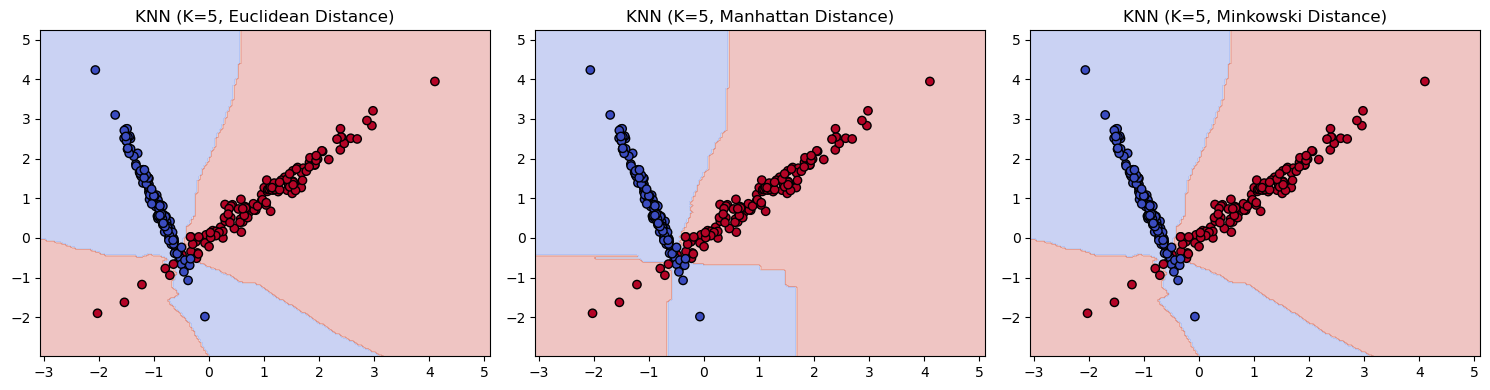

In [46]:
# DECISION BOUNDARIES (Visualization)

print("\n--- Visualizing Decision Boundaries with Different Distance Metrics ---")

metrics = ["euclidean", "manhattan", "minkowski"]
plt.figure(figsize=(15, 4))

for i, metric in enumerate(metrics):
    model = KNeighborsClassifier(n_neighbors=5, metric=metric)
    model.fit(X, y)

    # Mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.subplot(1, 3, i+1)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolor="k")
    plt.title(f"KNN (K=5, {metric.capitalize()} Distance)")

plt.tight_layout()
plt.show()

In [49]:
# DISTANCE METRIC COMPARISON

print("\n--- Classification Accuracy with Different Distance Metrics (K=5) ---")
for metric in ["euclidean", "manhattan", "minkowski"]:
    model = KNeighborsClassifier(n_neighbors=5, metric=metric)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"Accuracy with {metric.capitalize()} distance: {accuracy_score(y_test, preds):.2f}")

print("\n--- Regression MSE with Different Distance Metrics (K=5) ---")
for metric in ["euclidean", "manhattan", "minkowski"]:
    model = KNeighborsRegressor(n_neighbors=5, metric=metric)
    model.fit(Xr_train, yr_train)
    preds = model.predict(Xr_test)
    print(f"MSE with {metric.capitalize()} distance: {mean_squared_error(yr_test, preds):.2f}")


--- Classification Accuracy with Different Distance Metrics (K=5) ---
Accuracy with Euclidean distance: 0.99
Accuracy with Manhattan distance: 0.97
Accuracy with Minkowski distance: 0.99

--- Regression MSE with Different Distance Metrics (K=5) ---
MSE with Euclidean distance: 589.62
MSE with Manhattan distance: 589.62
MSE with Minkowski distance: 589.62
